# Imports

In [2]:
# Basic Python data structures and useful techniques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import json
from datetime import datetime, timedelta


## Data Structures and Generation
This section covers basic Python data structures and techniques including string manipulation, lists, dictionaries, and data generation.

In [3]:

# String manipulations
city_name = "Seattle"
state = "Washington"
region = "Pacific Northwest"

# String operations and f-strings
location = f"{city_name}, {state}"
print(f"Location: {location}")
print(f"City in lowercase: {city_name.lower()}")
print(f"State in uppercase: {state.upper()}")
print(f"Region contains 'Pacific': {'Pacific' in region}")
print(f"Location with replacement: {location.replace('Seattle', 'SEA')}")


Location: Seattle, Washington
City in lowercase: seattle
State in uppercase: WASHINGTON
Region contains 'Pacific': True
Location with replacement: SEA, Washington


In [4]:

# List operations
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
rainfall = [5.6, 3.5, 4.2, 2.7, 2.0, 1.6, 0.8, 1.0, 1.5, 3.5, 6.1, 5.9]

# Enumerate demonstration
print("\nMonthly rainfall using enumerate:")
for i, month in enumerate(months):
    print(f"  {i+1}. {month}: {rainfall[i]} inches")

# Zip demonstration
print("\nMonthly rainfall using zip:")
for j, (month, rain) in enumerate(zip(months, rainfall)):
    print(f"  {j+1}. {month}: {rain} inches")



Monthly rainfall using enumerate:
  1. Jan: 5.6 inches
  2. Feb: 3.5 inches
  3. Mar: 4.2 inches
  4. Apr: 2.7 inches
  5. May: 2.0 inches
  6. Jun: 1.6 inches
  7. Jul: 0.8 inches
  8. Aug: 1.0 inches
  9. Sep: 1.5 inches
  10. Oct: 3.5 inches
  11. Nov: 6.1 inches
  12. Dec: 5.9 inches

Monthly rainfall using zip:
  1. Jan: 5.6 inches
  2. Feb: 3.5 inches
  3. Mar: 4.2 inches
  4. Apr: 2.7 inches
  5. May: 2.0 inches
  6. Jun: 1.6 inches
  7. Jul: 0.8 inches
  8. Aug: 1.0 inches
  9. Sep: 1.5 inches
  10. Oct: 3.5 inches
  11. Nov: 6.1 inches
  12. Dec: 5.9 inches


In [5]:

# List comprehension with conditional
dry_months = [month for month, rain in zip(months, rainfall) if rain < 2.0]
print(f"\nDry months (< 2.0 inches rain): {', '.join(dry_months)}")

# Dictionary operations
weather_dict = {
    "city": city_name,
    "state": state,
    "annual_rainfall": sum(rainfall),
    "data_source": "National Weather Service",
    "dry months": dry_months,
    "monthly_rainfall": rainfall
}

# Dictionary iteration
print("\nWeather dictionary items:")
for key, value in weather_dict.items():
    print(f"  {key}: {value}")


Dry months (< 2.0 inches rain): Jun, Jul, Aug, Sep

Weather dictionary items:
  city: Seattle
  state: Washington
  annual_rainfall: 38.4
  data_source: National Weather Service
  dry months: ['Jun', 'Jul', 'Aug', 'Sep']
  monthly_rainfall: [5.6, 3.5, 4.2, 2.7, 2.0, 1.6, 0.8, 1.0, 1.5, 3.5, 6.1, 5.9]


## Weather Data Generation
Create a synthetic weather dataset with realistic patterns for multiple cities.

In [6]:
# Create a list of weather dictionaries for multiple cities
today = datetime.now().strftime("%Y-%m-%d")

# Generate a series of dates for time series data
dates = [(datetime.now() - timedelta(days=i)).strftime("%Y-%m-%d") for i in range(30, 0, -1)]

# Create weather data for multiple cities over time
weather_data = []
cities = ["Seattle", "Portland", "San Francisco", "Los Angeles", "Denver", 
          "Chicago", "New York", "Miami", "Boston", "Austin"]
base_temps = [52, 55, 59, 65, 50, 49, 54, 76, 51, 68]  # Base temperatures for each city

for date_idx, date in enumerate(dates):
    for city_idx, city in enumerate(cities):
        # Create realistic variations in temperature
        temp_variation = np.sin(date_idx/5) * 7 + np.random.normal(0, 3)
        temperature = round(base_temps[city_idx] + temp_variation, 1)
        
        # Create realistic humidity based on temperature
        humidity = round(max(30, min(90, 70 - temperature/3 + np.random.normal(0, 10))))
        
        # Determine weather condition based on temperature and randomness
        rand = np.random.random()
        if temperature < 35:
            condition = "Snowy" if rand < 0.7 else "Cloudy"
        elif temperature < 50:
            condition = "Rainy" if rand < 0.5 else "Cloudy" if rand < 0.8 else "Sunny"
        elif temperature < 65:
            condition = "Sunny" if rand < 0.6 else "Cloudy" if rand < 0.9 else "Rainy"
        else:
            condition = "Sunny" if rand < 0.8 else "Partly Cloudy"
            
        weather_data.append({
            "city": city,
            "date": date,
            "temperature": temperature,
            "humidity": humidity,
            "condition": condition,
            "precipitation": round(np.random.gamma(1, 2) if condition in ["Rainy", "Snowy"] else 0, 1),
            "region": "West" if city_idx < 5 else "East"
        })

# Save as JSON to demonstrate file operations
with open('../data/00_intro/weather_data.json', 'w+') as f:
    json.dump(weather_data, f)

print(f"Created JSON file with {len(weather_data)} weather records")

Created JSON file with 300 weather records


## Data Loading and Preparation
Load the data from JSON file and prepare it for analysis by creating DataFrames and calculated fields.

In [7]:
# Load the data from JSON file to simulate file reading
with open('../data/00_intro/weather_data.json', 'r') as f:
    loaded_data = json.load(f)
    
print(f"Loaded {len(loaded_data)} records from JSON file")

# Create pandas DataFrame from JSON data
df = pd.DataFrame(loaded_data)

# Convert date to datetime for time series operations
df['date'] = pd.to_datetime(df['date'])

# Add useful calculated columns
df['temp_celsius'] = round((df['temperature'] - 32) * 5/9, 1)
df['feels_like'] = round(df['temperature'] - 5 + (df['humidity'] * 0.1), 1)

print("\nDataFrame preview:")
print(df.head())

print(f"\nShape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"Data types:\n{df.dtypes}")

Loaded 300 records from JSON file

DataFrame preview:
            city       date  temperature  humidity condition  precipitation  \
0        Seattle 2025-02-03         56.0        60     Sunny            0.0   
1       Portland 2025-02-03         52.9        42     Sunny            0.0   
2  San Francisco 2025-02-03         60.3        57     Sunny            0.0   
3    Los Angeles 2025-02-03         68.4        35     Sunny            0.0   
4         Denver 2025-02-03         47.2        54     Rainy            1.2   

  region  temp_celsius  feels_like  
0   West          13.3        57.0  
1   West          11.6        52.1  
2   West          15.7        61.0  
3   West          20.2        66.9  
4   West           8.4        47.6  

Shape: (300, 9)
Columns: ['city', 'date', 'temperature', 'humidity', 'condition', 'precipitation', 'region', 'temp_celsius', 'feels_like']
Data types:
city                     object
date             datetime64[ns]
temperature             float64
h

## Basic Data Analysis
Perform basic statistical operations on the weather data including mean, median, min, max values, and compute aggregations.

In [8]:
# Basic statistical operations
numeric_df = df.select_dtypes(include=[np.number])
df_mean = numeric_df.mean()
df_median = numeric_df.median()
df_min = numeric_df.min()
df_max = numeric_df.max()

print("Weather Data - Mean:")
print(df_mean)

print("\nWeather Data - Median:")
print(df_median)

print("\nWeather Data - Min:")
print(df_min)

print("\nWeather Data - Max:")
print(df_max)

# Group data by city and compute aggregations
city_stats = df.groupby('city').agg({
    'temperature': ['mean', 'median', 'min', 'max'],
    'humidity': ['mean', 'min', 'max'],
    'precipitation': ['mean', 'sum']
})

print("\nWeather Data - Grouped by city:")
print(city_stats)

# Group data by region and compute aggregations
region_stats = df.groupby('region').agg({
    'temperature': ['mean', 'median', 'min', 'max'],
    'humidity': ['mean', 'min', 'max'],
    'precipitation': ['mean', 'sum']
})

print("\nWeather Data - Grouped by region:")
print(region_stats)

Weather Data - Mean:
temperature      57.907667
humidity         50.116667
precipitation     0.239667
temp_celsius     14.394000
feels_like       57.919333
dtype: float64

Weather Data - Median:
temperature      56.45
humidity         50.00
precipitation     0.00
temp_celsius     13.60
feels_like       56.55
dtype: float64

Weather Data - Min:
temperature      37.6
humidity         30.0
precipitation     0.0
temp_celsius      3.1
feels_like       37.4
dtype: float64

Weather Data - Max:
temperature      89.4
humidity         88.0
precipitation     6.2
temp_celsius     31.9
feels_like       89.3
dtype: float64

Weather Data - Grouped by city:
              temperature                      humidity         precipitation  \
                     mean median   min   max       mean min max          mean   
city                                                                            
Austin          68.023333  67.30  55.1  79.3  47.700000  30  64      0.000000   
Boston          50.980000 

## Data Manipulation Techniques
Apply common data manipulation methods like sorting, handling missing values, applying functions, creating new columns, filtering and selecting.

In [9]:
# Sorting the data by temperature
sorted_df = df.sort_values(by='temperature', ascending=False)
print("Sorted Weather Data by Temperature (Highest First):")
print(sorted_df[['city', 'date', 'temperature', 'condition']].head())

# Inserting some missing values to demonstrate handling
df_with_na = df.copy()
df_with_na.loc[np.random.choice(df.index, 20), 'temperature'] = np.nan
df_with_na.loc[np.random.choice(df.index, 20), 'humidity'] = np.nan

print(f"\nRows with missing values: {df_with_na.isna().any(axis=1).sum()}")

Sorted Weather Data by Temperature (Highest First):
      city       date  temperature      condition
67   Miami 2025-02-09         89.4  Partly Cloudy
117  Miami 2025-02-14         86.2          Sunny
27   Miami 2025-02-05         84.8          Sunny
87   Miami 2025-02-11         84.1          Sunny
77   Miami 2025-02-10         82.5          Sunny

Rows with missing values: 37


In [10]:
# Handling missing values by filling them with the mean of the city
df_filled = df_with_na.copy()
for city in df['city'].unique():
    city_mean = df_with_na[df_with_na['city'] == city].mean(numeric_only=True)
    city_mask = df_filled['city'] == city
    df_filled.loc[city_mask, 'temperature'] = df_filled.loc[city_mask, 'temperature'].fillna(city_mean['temperature'])
    df_filled.loc[city_mask, 'humidity'] = df_filled.loc[city_mask, 'humidity'].fillna(city_mean['humidity'])

print("\nMissing values after filling:", df_filled.isna().sum().sum())



Missing values after filling: 0


In [11]:
# Applying a function to convert temperature to another unit (Kelvin)
def fahrenheit_to_kelvin(temp):
    return (temp - 32) * 5/9 + 273.15

df['temp_kelvin'] = df['temperature'].apply(fahrenheit_to_kelvin).round(1)
print("\nTemperature in multiple units:")
print(df[['city', 'temperature', 'temp_celsius', 'temp_kelvin']].head())

# Creating a categorical column for temperature ranges
def temp_category(temp):
    if temp < 32:
        return "Freezing"
    elif temp < 50:
        return "Cold"
    elif temp < 70:
        return "Moderate"
    elif temp < 85:
        return "Warm"
    else:
        return "Hot"

df['temp_category'] = df['temperature'].apply(temp_category)
print("\nTemperature categories:")
print(df.groupby('temp_category').size())


Temperature in multiple units:
            city  temperature  temp_celsius  temp_kelvin
0        Seattle         56.0          13.3        286.5
1       Portland         52.9          11.6        284.8
2  San Francisco         60.3          15.7        288.9
3    Los Angeles         68.4          20.2        293.4
4         Denver         47.2           8.4        281.6

Temperature categories:
temp_category
Cold         71
Hot           2
Moderate    178
Warm         49
dtype: int64


In [12]:
# Filter data using boolean masks
hot_days = df[df['temperature'] > 75]
print(f"Hot days (temperature > 75°F): {len(hot_days)} records")
print(hot_days[['city', 'date', 'temperature', 'condition']].head())

# Select specific columns using loc[]
selected_columns = df.loc[:, ['city', 'date', 'temperature', 'condition']]
print("\nSelected Columns:")
print(selected_columns.head())

# Select specific rows using iloc[]
selected_rows = df.iloc[10:15]
print("\nSelected Rows (10 to 14):")
print(selected_rows[['city', 'date', 'temperature']])

# Filter data using query() method
rainy_west = df.query('condition == "Rainy" and region == "West"')
print(f"\nRainy days in Western region: {len(rainy_west)} records")
print(rainy_west[['city', 'date', 'temperature', 'precipitation']].head())

# Complex filtering with multiple conditions
interesting_days = df[
    (df['temperature'] > 70) & 
    (df['humidity'] < 50) & 
    (df['precipitation'] == 0)
]
print(f"\nWarm, dry days with no precipitation: {len(interesting_days)} records")
print(interesting_days[['city', 'date', 'temperature', 'humidity', 'condition']].head())

# Get the hottest day for each city
hottest_days = df.loc[df.groupby('city')['temperature'].idxmax()]
print("\nHottest day for each city:")
print(hottest_days[['city', 'date', 'temperature', 'humidity', 'condition']])

Hot days (temperature > 75°F): 23 records
      city       date  temperature      condition
27   Miami 2025-02-05         84.8          Sunny
37   Miami 2025-02-06         79.4  Partly Cloudy
47   Miami 2025-02-07         78.3          Sunny
49  Austin 2025-02-07         76.6          Sunny
57   Miami 2025-02-08         77.7          Sunny

Selected Columns:
            city       date  temperature condition
0        Seattle 2025-02-03         56.0     Sunny
1       Portland 2025-02-03         52.9     Sunny
2  San Francisco 2025-02-03         60.3     Sunny
3    Los Angeles 2025-02-03         68.4     Sunny
4         Denver 2025-02-03         47.2     Rainy

Selected Rows (10 to 14):
             city       date  temperature
10        Seattle 2025-02-04         55.6
11       Portland 2025-02-04         56.4
12  San Francisco 2025-02-04         64.3
13    Los Angeles 2025-02-04         71.0
14         Denver 2025-02-04         52.5

Rainy days in Western region: 27 records
        city

## Data Visualization Techniques
Create visualizations using matplotlib and seaborn including line charts, bar charts, histograms, and scatter plots.

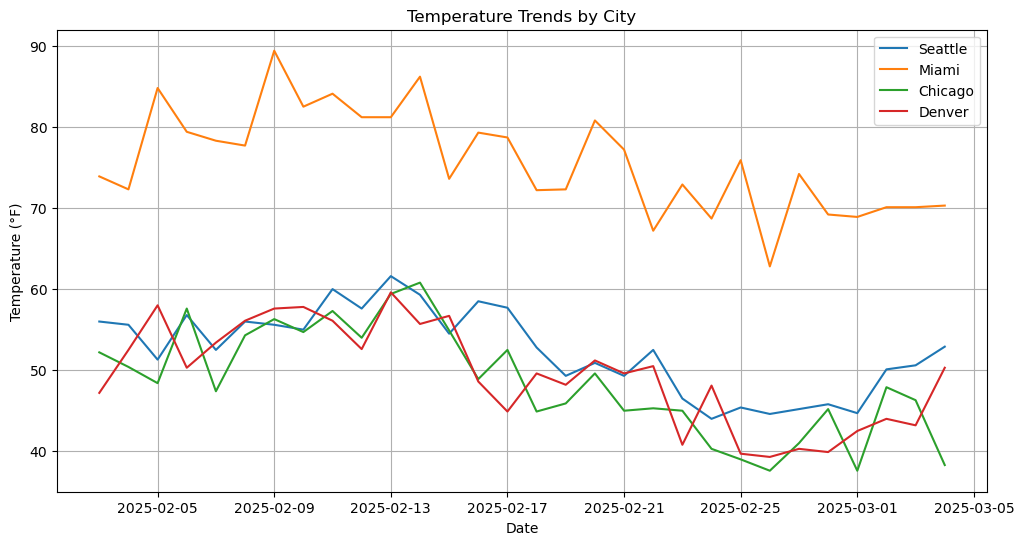

In [13]:
# Time series line chart of temperatures for selected cities
plt.figure(figsize=(12, 6))
for city in ['Seattle', 'Miami', 'Chicago', 'Denver']:
    city_data = df[df['city'] == city]
    plt.plot(city_data['date'], city_data['temperature'], label=city)

plt.title('Temperature Trends by City')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.grid(True)
plt.show()





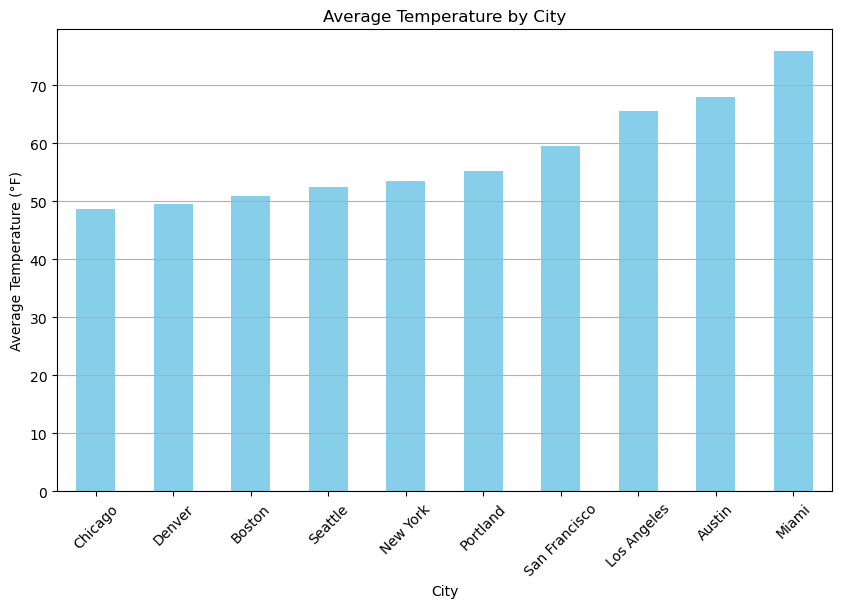

In [14]:

# Bar chart of average temperature by city
city_avg_temp = df.groupby('city')['temperature'].mean().sort_values()
plt.figure(figsize=(10, 6))
city_avg_temp.plot(kind='bar', color='skyblue')
plt.title('Average Temperature by City')
plt.xlabel('City')
plt.ylabel('Average Temperature (°F)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

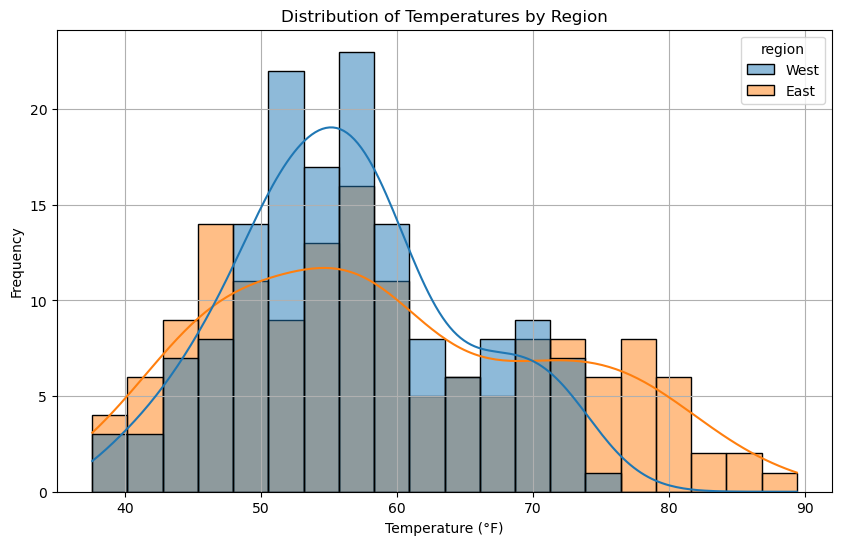

In [15]:

# Histogram of temperatures
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='temperature', hue='region', bins=20, kde=True, alpha=0.5)
plt.title('Distribution of Temperatures by Region')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

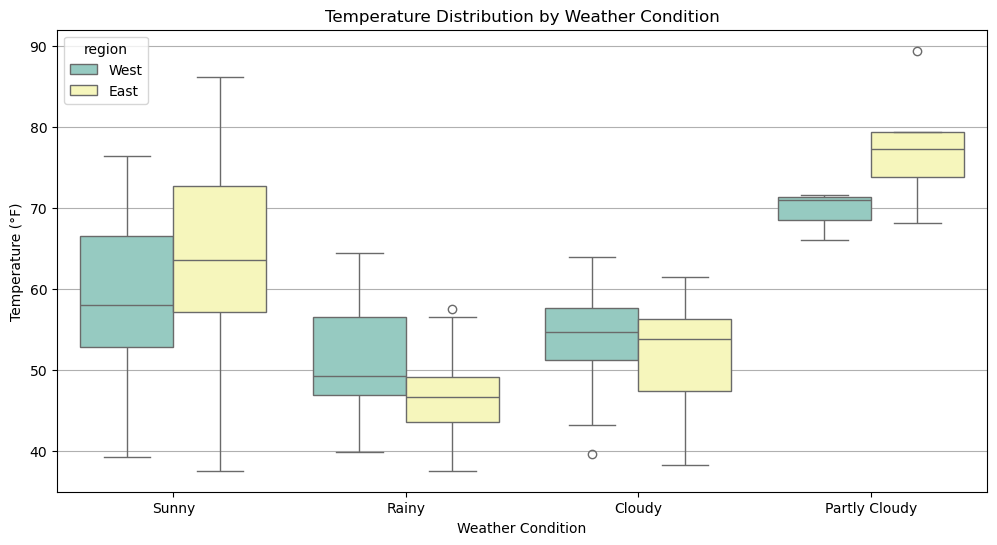

In [19]:

# Box plot of temperatures by condition
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='condition', y='temperature', palette='Set3', hue='region')
plt.title('Temperature Distribution by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Temperature (°F)')
plt.grid(axis='y')
plt.show()

In [18]:
import plotly.express as px
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Get unique regions and conditions
regions = sorted(df['region'].unique())
conditions = sorted(df['condition'].unique())

# Add traces for "All Conditions" (default view)
for i, region in enumerate(regions):
    region_data = df[df['region'] == region]

    # For the "All Conditions" traces
    fig.add_trace(go.Box(
        x=region_data['city'],
        y=region_data['temperature'],
        name=region,
        legendgroup=region,
        showlegend=True,
        boxmean=False,
        marker_color=px.colors.qualitative.Plotly[i % len(px.colors.qualitative.Plotly)],
        visible=True,
        hoverinfo='none',  # Disable default hover
        customdata=[[temp] for temp in region_data['temperature']],  # Pass temperature as custom data
        hovertemplate='%{customdata[0]:.1f}°F<extra></extra>',  # Use custom data for hover
        boxpoints=False,
        line_width=1.5
    ))

# Create a separate figure for each condition
condition_figures = {}
for condition in conditions:
    condition_figures[condition] = []
    processed_regions = set()
    
    for i, region in enumerate(regions):
        condition_data = df[df['condition'] == condition]
        region_condition_data = condition_data[condition_data['region'] == region]
        
        if len(region_condition_data) == 0:
            continue
        
        show_in_legend = region not in processed_regions
        if show_in_legend:
            processed_regions.add(region)
        
        # Box plot for each condition
        trace = go.Box(
            x=region_condition_data['city'],
            y=region_condition_data['temperature'],
            name=region,
            legendgroup=region,
            showlegend=show_in_legend,
            boxmean=False,
            marker_color=px.colors.qualitative.Plotly[i % len(px.colors.qualitative.Plotly)],
            visible=False,
            hoverinfo='none',  # Disable default hover
            customdata=[[temp] for temp in region_condition_data['temperature']],  # Pass temperature as custom data
            hovertemplate='%{customdata[0]:.1f}°F<extra></extra>',  # Use custom data for hover
            boxpoints=False,
            line_width=1.5
        )
        
        fig.add_trace(trace)
        condition_figures[condition].append(len(fig.data) - 1)

# Create dropdown menu
buttons = []
traces_per_view = len(regions)

# Button for "All Conditions"
all_visible = [False] * len(fig.data)
for i in range(traces_per_view):
    all_visible[i] = True

buttons.append(dict(
    method='update',
    label='All Conditions',
    args=[{'visible': all_visible}, {'autorange': True}]
))

# Button for each condition
for condition in conditions:
    condition_visible = [False] * len(fig.data)
    
    for trace_idx in condition_figures[condition]:
        condition_visible[trace_idx] = True
    
    buttons.append(dict(
        method='update',
        label=condition,
        args=[{'visible': condition_visible}, {'autorange': True}]
    ))

# Update layout
fig.update_layout(
    title={'text': 'Temperature Distribution by City', 'x': 0.5},
    xaxis_title='City',
    yaxis_title='Temperature (°F)',
    boxmode='group',
    height=500,
    width=800,
    font=dict(size=12),
    updatemenus=[{
        'buttons': buttons,
        'direction': 'down',
        'showactive': True,
        'x': 0.1,
        'y': 1.15,
    }],
    uirevision='same',
    legend=dict(
        itemclick='toggleothers',
        itemdoubleclick='toggle'
    ),
    hovermode='closest'
)

fig.update_layout(
    hoverlabel=dict(bgcolor="white", font_size=12)
)

# Apply only visual properties, not hover properties
for trace in fig.data:
    trace.fillcolor = 'rgba(255,255,255,0.6)'

fig.show()

plt.tight_layout()

<Figure size 640x480 with 0 Axes>